In [302]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [303]:
df  = pd.read_csv("data\Clean2_Smart_Phones.csv")
df.drop(columns="Unnamed: 0",inplace=True)

In [304]:
df  = df.reset_index()
df.head(2)

,index,Brand,model,price,Has_5G,Has_NFC,Has_IR_Blaster,Processor_Model,Processor_Name,Processor_Core,Processor_Speed,rating,Ram,Memory,Battery,Screen_size,Resolution,Num_Back_Cam,Back_Camera_MP,Front_CAM_MP,Num_Front_Cam,Refresh_Rate,Fast_Charge,OS_Name,os_version,card_support,slot_type,capacity_gb
0,0,Vertu,Vertu Signature Touch,650000,False,True,False,Snapdragon,Snapdragon 801,8.0,1.5,62,2.0,64.0,2275.0,4.70,1080 x 1920,1,13.0,2.1,1,60,NaN,Android,4.4,0,Not Slot,0
1,1,Xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,False,True,False,Snapdragon,Snapdragon 855,8.0,2.8,88,8.0,256.0,4000.0,6.39,1080 x 2340,3,48.0,20.0,1,60,27.0,Android,9.0,0,Not Slot,0


In [305]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            981 non-null    int64  
 1   Brand            981 non-null    str    
 2   model            981 non-null    str    
 3   price            981 non-null    int64  
 4   Has_5G           981 non-null    bool   
 5   Has_NFC          981 non-null    bool   
 6   Has_IR_Blaster   981 non-null    bool   
 7   Processor_Model  981 non-null    str    
 8   Processor_Name   981 non-null    str    
 9   Processor_Core   975 non-null    float64
 10  Processor_Speed  948 non-null    float64
 11  rating           981 non-null    int64  
 12  Ram              978 non-null    float64
 13  Memory           981 non-null    float64
 14  Battery          970 non-null    float64
 15  Screen_size      981 non-null    float64
 16  Resolution       981 non-null    str    
 17  Num_Back_Cam     981 non-nu

<Axes: >

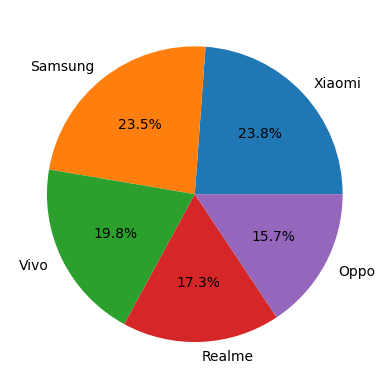

In [306]:
df["Brand"].value_counts().head(5).plot(kind="pie",autopct = "%0.1f%%")

In [307]:
df["price"].describe()

count       981.000000
mean      32494.386340
std       39520.105406
min        3499.000000
25%       12999.000000
50%       19990.000000
75%       35489.000000
max      650000.000000
Name: price, dtype: float64

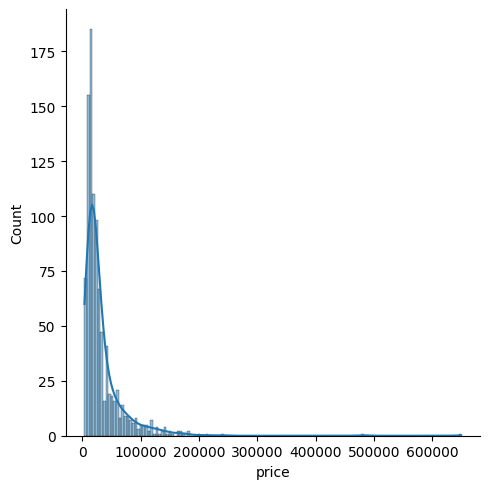

In [308]:
sns.displot(kind="hist",data=df,x="price",kde= True)

6.592612911141155


<Axes: ylabel='price'>

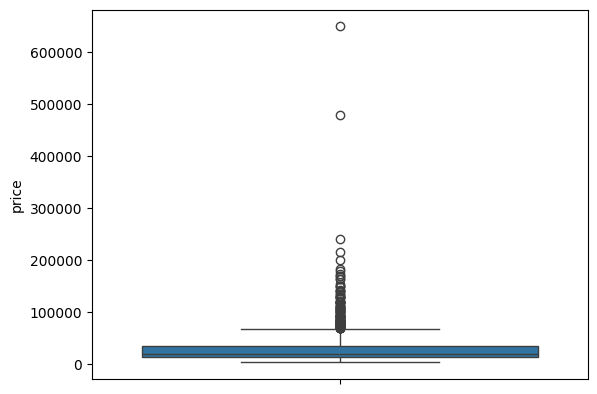

In [309]:
print(df["price"].skew())

sns.boxplot(df,y="price")

In [310]:
df[df["price"]>200000]

,index,Brand,model,price,Has_5G,Has_NFC,Has_IR_Blaster,Processor_Model,Processor_Name,Processor_Core,Processor_Speed,rating,Ram,Memory,Battery,Screen_size,Resolution,Num_Back_Cam,Back_Camera_MP,Front_CAM_MP,Num_Front_Cam,Refresh_Rate,Fast_Charge,OS_Name,os_version,card_support,slot_type,capacity_gb
0,0,Vertu,Vertu Signature Touch,650000,False,True,False,Snapdragon,Snapdragon 801,8.0,1.50,62,2.0,64.0,2275.0,4.70,1080 x 1920,1,13.0,2.1,1,60,NaN,Android,4.4,0,Not Slot,0
1,1,Xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,False,True,False,Snapdragon,Snapdragon 855,8.0,2.80,88,8.0,256.0,4000.0,6.39,1080 x 2340,3,48.0,20.0,1,60,27.0,Android,9.0,0,Not Slot,0
2,2,Huawei,Huawei Mate 50 RS Porsche Design,239999,False,True,True,Snapdragon,Snapdragon 8+ Gen1,8.0,3.20,81,NaN,512.0,4700.0,6.74,1212 x 2616,3,50.0,13.0,1,120,66.0,Hongmeng,3.0,1,Hybird,256
3,3,Huawei,Huawei Mate 30 RS Porsche Design,214990,True,True,True,Kirin,Kirin 990,8.0,2.86,0,12.0,512.0,4500.0,6.53,1176 x 2400,4,40.0,32.0,2,60,40.0,Android,10.0,1,Hybird,256


In [311]:
df["rating"] = df["rating"].replace({0:np.nan},inplace=True)

In [312]:
df["rating"].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

-0.6989993034105535

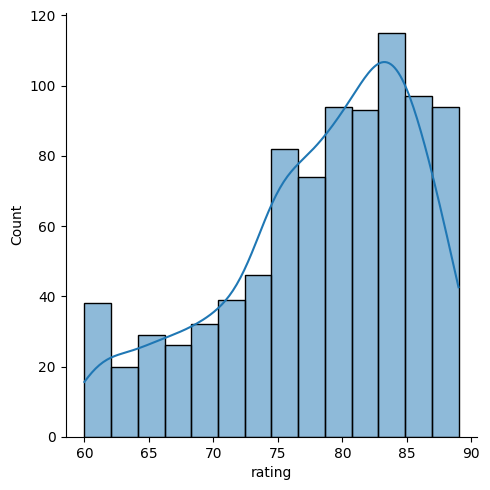

In [313]:
sns.displot(kind="hist",data = df,x= "rating",kde =True)
df["rating"].skew()

<Axes: ylabel='rating'>

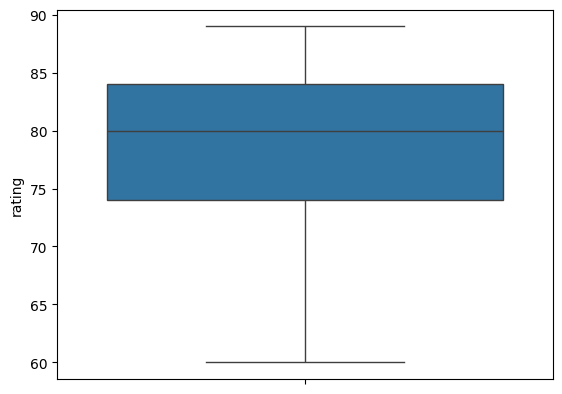

In [314]:
sns.boxplot(data = df,y= "rating")

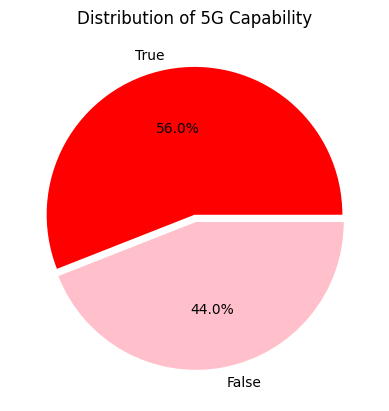

In [315]:
counts = df["Has_5G"].value_counts()
plt.pie(counts,labels=counts.index,explode=[0.01,0.04],autopct="%0.1f%%",colors=["red","pink"])
plt.title('Distribution of 5G Capability')
plt.show()

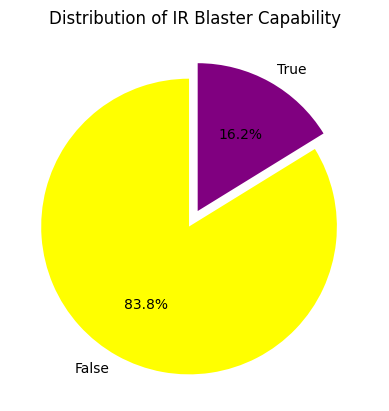

In [316]:
counts = df["Has_IR_Blaster"].value_counts()
plt.pie(counts,labels=counts.index,explode=[0.08,0.04],autopct="%0.1f%%",colors=["yellow","purple"],startangle=90)
plt.title('Distribution of IR Blaster Capability')
plt.show()

Text(0.5, 1.0, 'Distribution of NFC Capability')

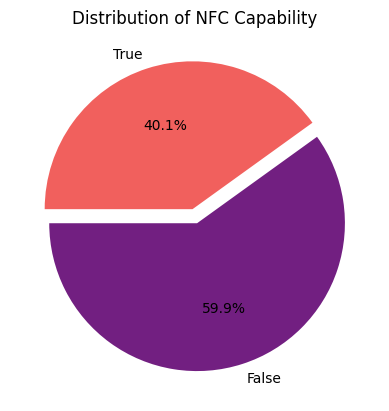

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get the counts
counts = df["Has_NFC"].value_counts()

colors = sns.color_palette("magma", len(counts))

# 3. Create the pie chart
plt.pie(
    counts, 
    labels=counts.index, 
    explode=[0.05, 0.05], # Slight separation for all slices
    autopct="%0.1f%%", 
    colors=colors,        # Fixed parameter name
    startangle=180
)

plt.title('Distribution of NFC Capability')


In [318]:
df["Processor_Model"] = df["Processor_Model"].str.split(",").str.get(0)
df["Processor_Model"] = df["Processor_Model"].replace({"Sanpdragon":"Snapdragon"},inplace=True)
print(df["Processor_Model"].value_counts())

temp_df = df[df["Processor_Model"] == "Sc9863a"]   ### There is two processor half written so transform to full name to model or name of procesor
df.loc[temp_df.index,"Processor_Name"] = "Unisoc SC9863A"   
df.loc[temp_df.index,"Processor_Model"]=  "Unisoc"

Processor_Model
Snapdragon    418
Helio         204
Dimensity     178
Unisoc         59
Exynos         56
Bionic         41
Tensor          9
Kirin           8
A13             5
Sc9863a         2
Tesla           1
Name: count, dtype: int64


### There is some iphone model that written like A13 Bionic so simply reverse than like Bionic A13 enusring consistency

In [319]:
print(df["Processor_Model"].value_counts())
# Split the string, reverse the list, and join it back together
temp_df = df[df["Processor_Model"] =="A13"]
df.loc[temp_df.index,"Processor_Name"] = temp_df["Processor_Name"].apply(lambda x : " ".join(x.split()[::-1]))
#df["Processor_A16"].apply(lambda x: " ".join(x.split()[::-1]))
df["Processor_Model"] = df["Processor_Model"].replace({"A13":"Bionic"},inplace=True)

df["Processor_Model"].value_counts()

Processor_Model
Snapdragon    418
Helio         204
Dimensity     178
Unisoc         61
Exynos         56
Bionic         41
Tensor          9
Kirin           8
A13             5
Tesla           1
Name: count, dtype: int64


Processor_Model
Snapdragon    418
Helio         204
Dimensity     178
Unisoc         61
Exynos         56
Bionic         46
Tensor          9
Kirin           8
Tesla           1
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Processor Brand Capability')

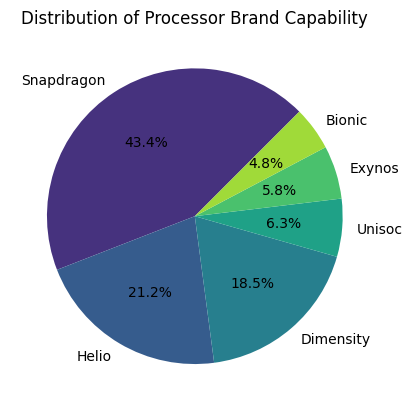

In [320]:
count = df["Processor_Model"].value_counts().head(6)
colors  = sns.color_palette("viridis",len(count))
plt.pie(count,labels=count.index,startangle=45,colors=colors,autopct="%0.1f%%")
plt.title('Distribution of Processor Brand Capability')

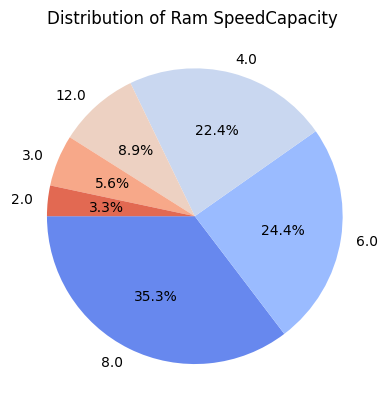

In [321]:
count = df["Ram"].value_counts().head(6)
colors  = sns.color_palette("coolwarm",len(count))
plt.pie(count,labels=count.index,startangle=180,colors=colors,autopct="%0.1f%%")
plt.title('Distribution of Ram SpeedCapacity ')
plt.show()

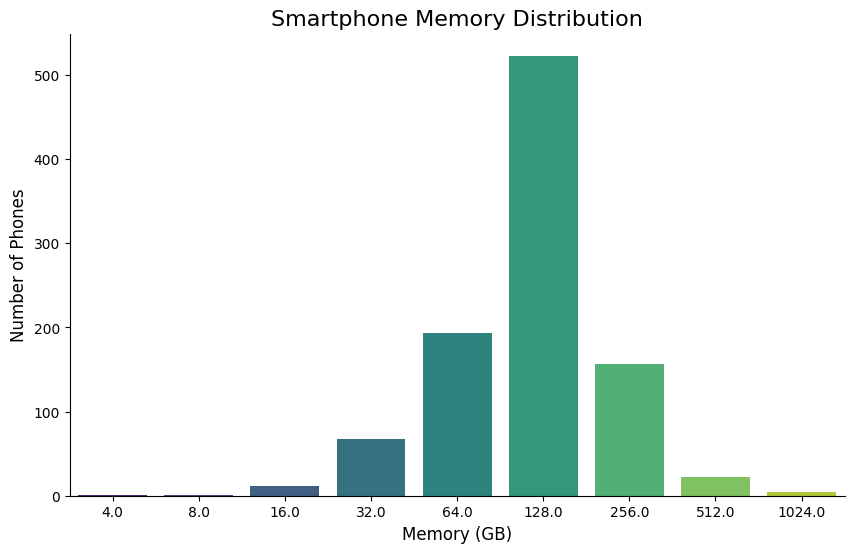

In [322]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Prepare the data
counts = df['Memory'].value_counts().sort_index()

# 2. Create a colorful bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, palette="viridis")

# 3. Add just the essential labels
plt.title('Smartphone Memory Distribution', fontsize=16)
plt.xlabel('Memory (GB)', fontsize=12)
plt.ylabel('Number of Phones', fontsize=12)

# 4. Clean the background
sns.despine() 
plt.show()

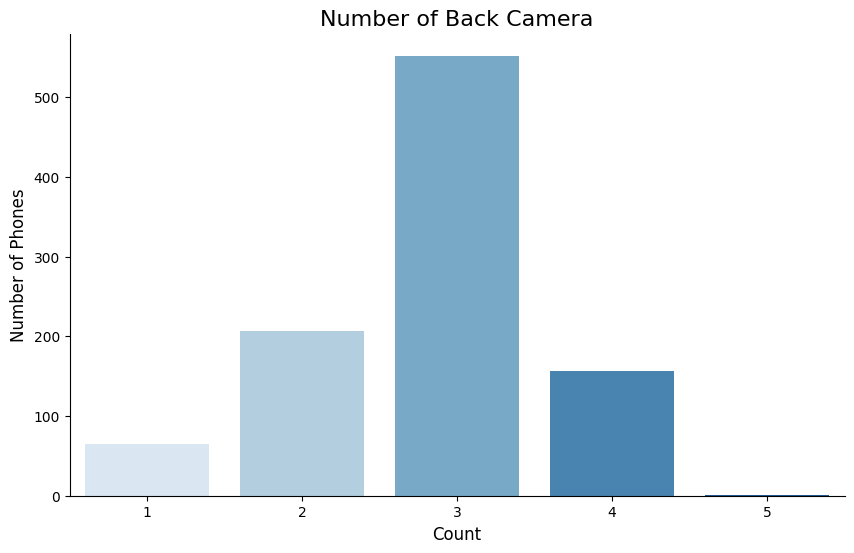

In [323]:
num_cam = df["Num_Back_Cam"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=num_cam.index, y=num_cam.values, palette="Blues")

# 3. Add just the essential labels
plt.title('Number of Back Camera', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Number of Phones', fontsize=12)

# 4. Clean the background
sns.despine() 
plt.show()


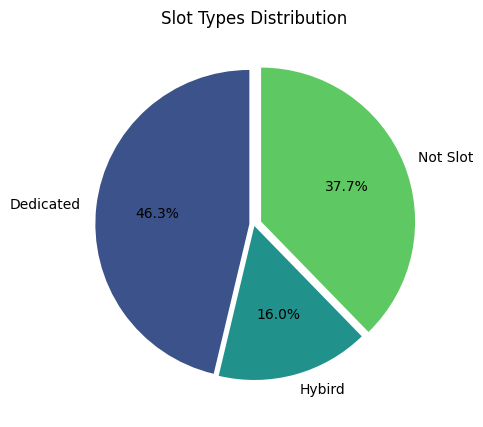

In [324]:
slot = df["slot_type"].value_counts().sort_index()
color  = sns.color_palette("viridis",len(slot))
plt.figure(figsize=(8,5))
plt.pie(data = df,x=slot,labels=slot.index,explode = [0.03,0.01,0.05],startangle=90,autopct="%0.1f%%",colors=color)
plt.title("Slot Types Distribution")
plt.show()

In [325]:
def plot(col):
    # Pass the dataframe with the 'data' parameter
    sns.displot(data=df, x=col, kind="hist", kde=True, label=col)
    sns.catplot(data=df, x=col, kind="box")
    plt.show()  

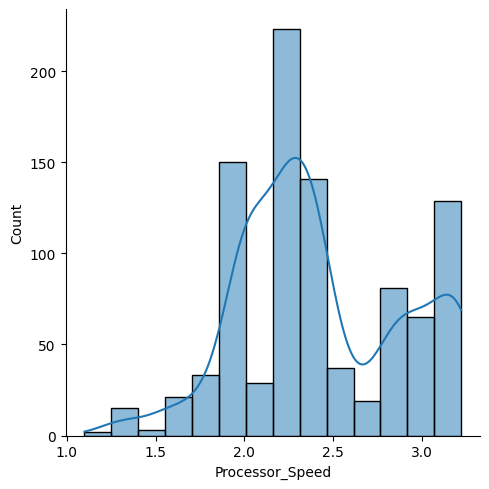

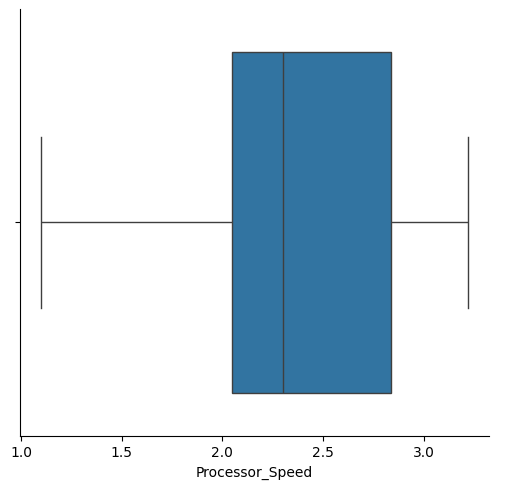

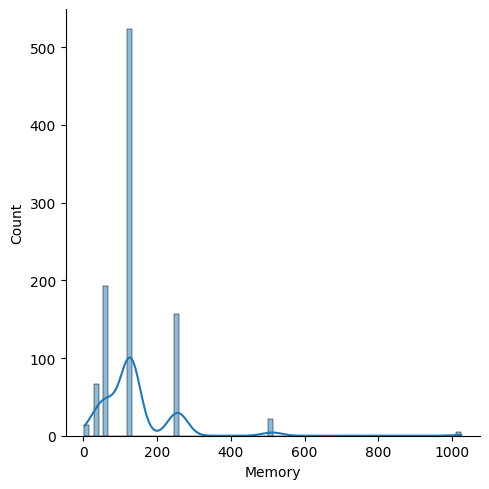

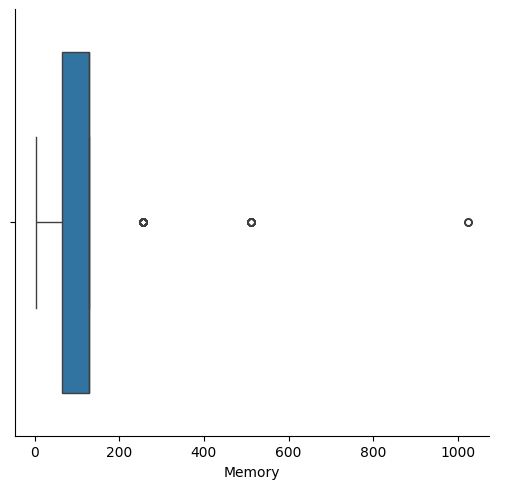

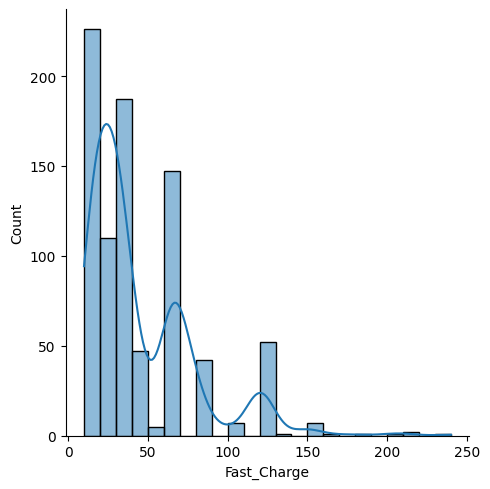

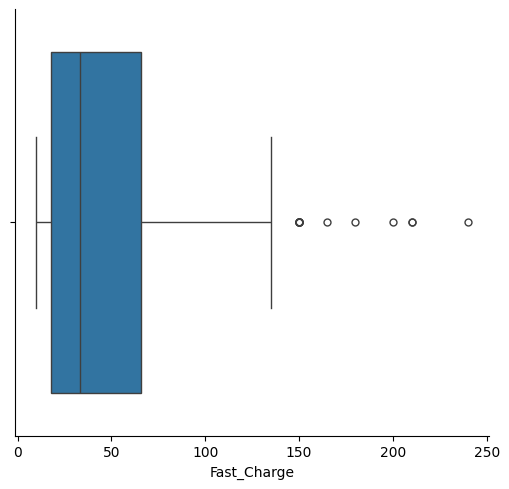

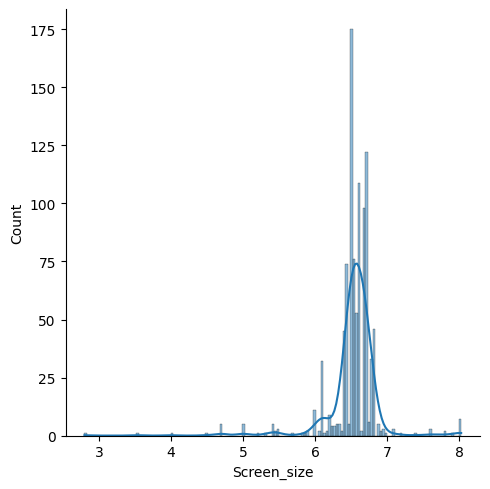

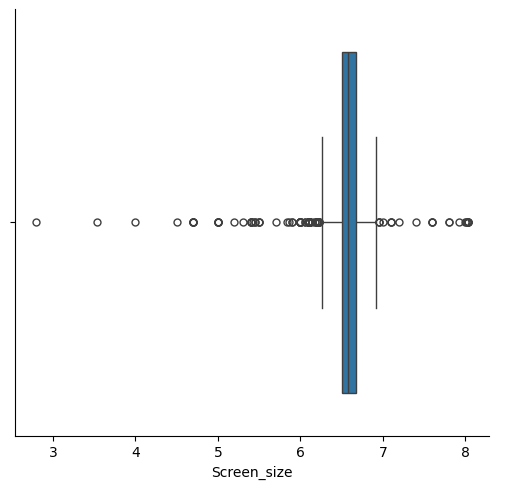

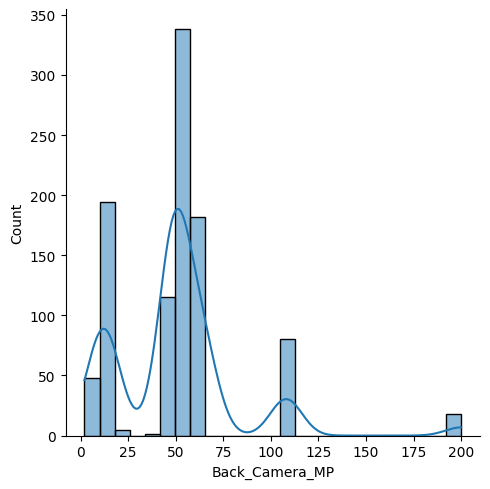

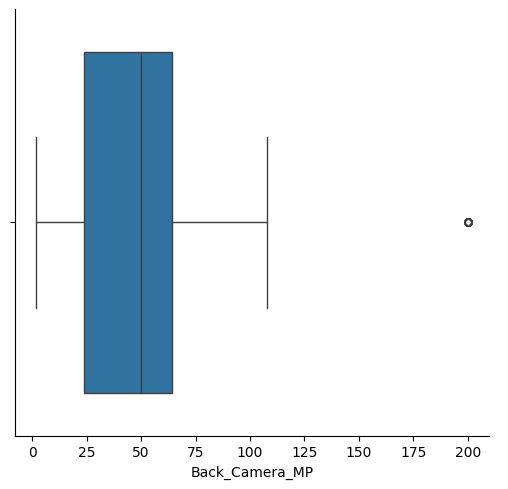

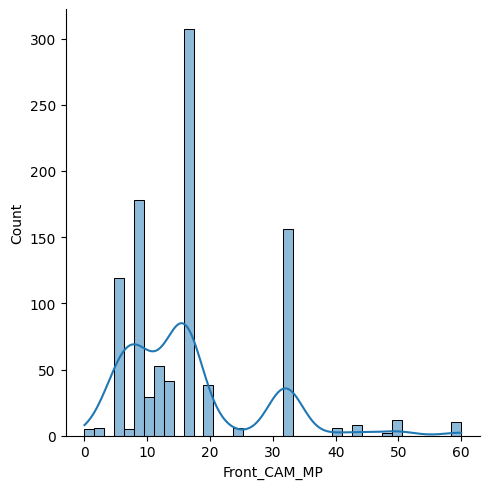

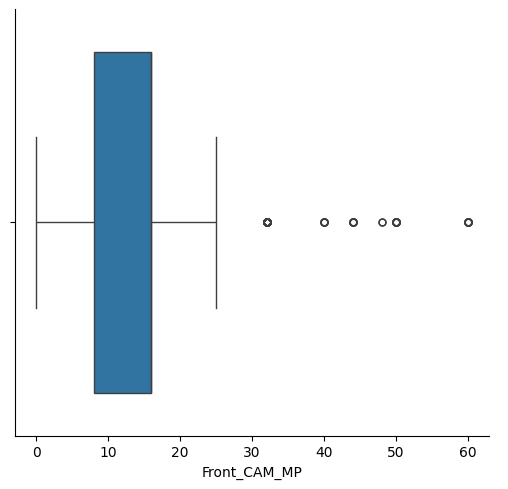

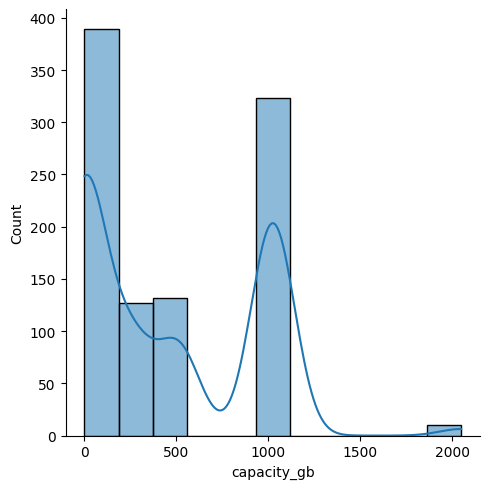

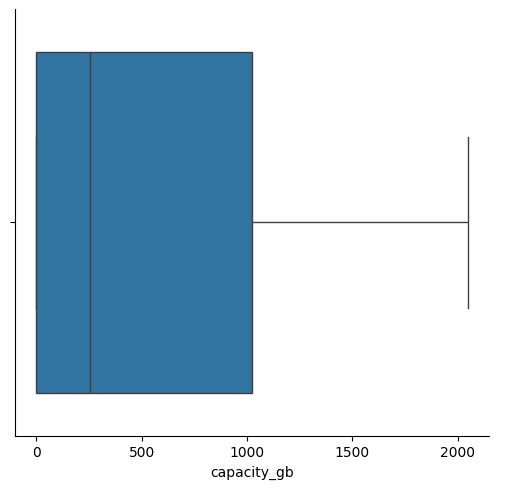

In [326]:
num_coloumns = df.select_dtypes(include=["float64","int64"]).iloc[:,[3,6,14,8,10,11,17]].columns


for col in num_coloumns:
    plot(col)

#### Biavariate Analysis

In [327]:
df["Brand"] = df["Brand"].str.capitalize()


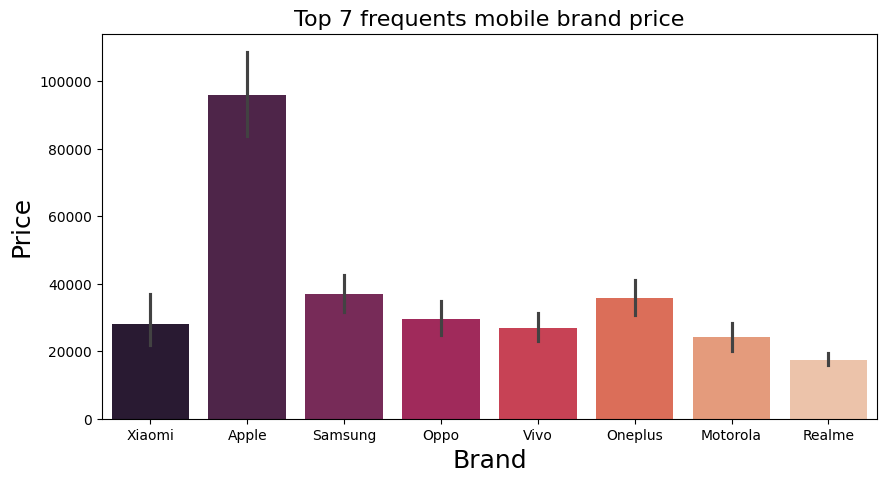

In [328]:
temp_df_counts = df.groupby("Brand").count()["model"].sort_values(ascending=False).head(8) 
temp_df = df[df["Brand"].isin(temp_df_counts.index)]

plt.figure(figsize=(10, 5))

# Plotting
sns.barplot(data=temp_df, x="Brand", y="price", palette="rocket", hue="Brand", legend=False)




# Also adjusting the Y-axi
plt.xlabel("Brand", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Top 7 frequents mobile brand price",fontsize = 16)

plt.show()


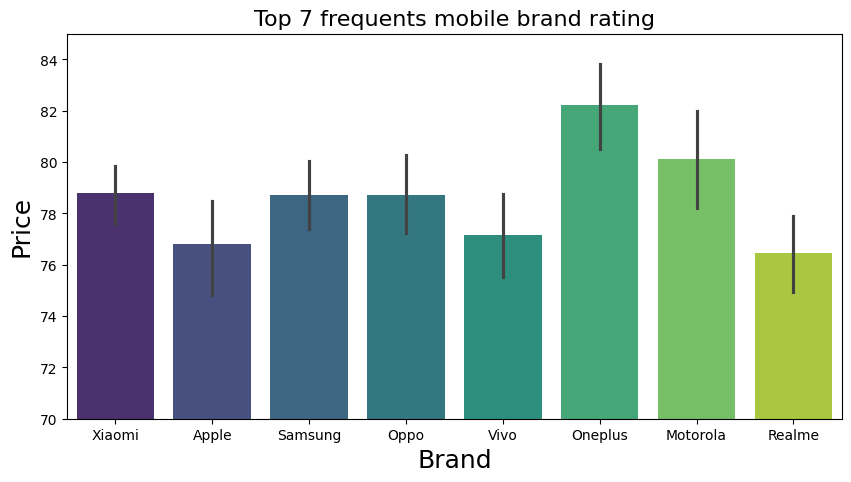

In [329]:
plt.figure(figsize=(10, 5))

# Plotting
sns.barplot(data=temp_df, x="Brand", y="rating", palette="viridis", hue="Brand", legend=False)
# Also adjusting the Y-axi
plt.ylim(70,85)
plt.xlabel("Brand", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Top 7 frequents mobile brand rating",fontsize = 16)

plt.show()


<Axes: xlabel='Has_5G', ylabel='price'>

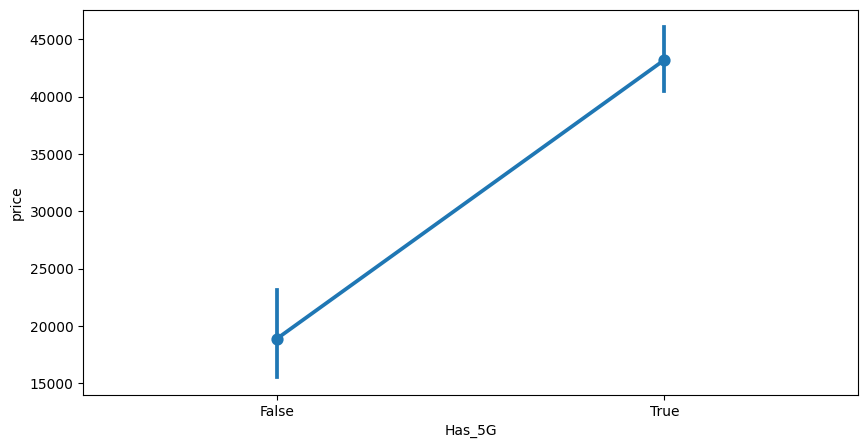

In [330]:
plt.figure(figsize=(10, 5))
sns.pointplot(data=df,x="Has_5G",y="price",estimator=np.mean)

#### Simple Indicate Mobile which have NFC Has higher price

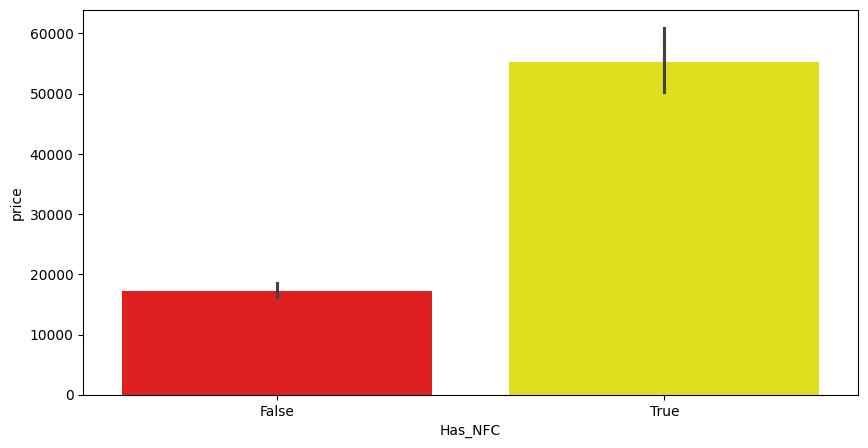

In [331]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df,x = "Has_NFC",y = "price",palette=["red","yellow"],estimator=np.mean)
plt.show()

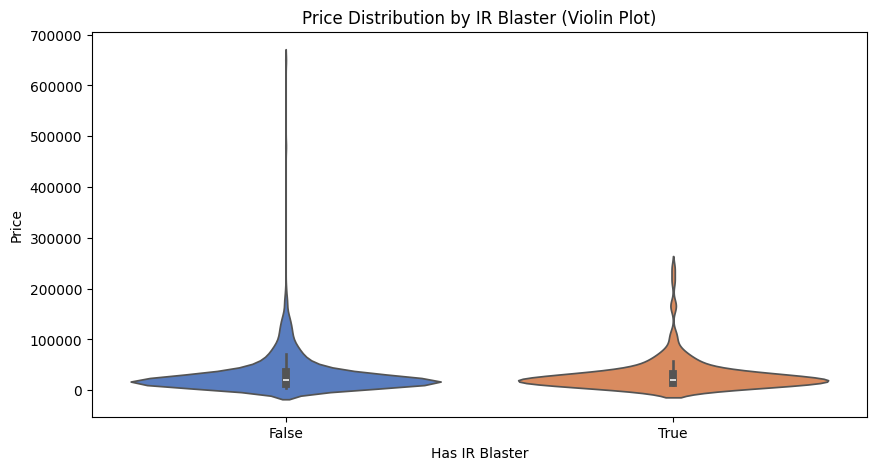

In [332]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x="Has_IR_Blaster", y="price", palette="muted")
plt.title("Price Distribution by IR Blaster (Violin Plot)")
plt.ylabel("Price")
plt.xlabel("Has IR Blaster")
plt.show()

#### Processor that have huge price
1. Bionic 
#### Processor with low price
1. Unisoc

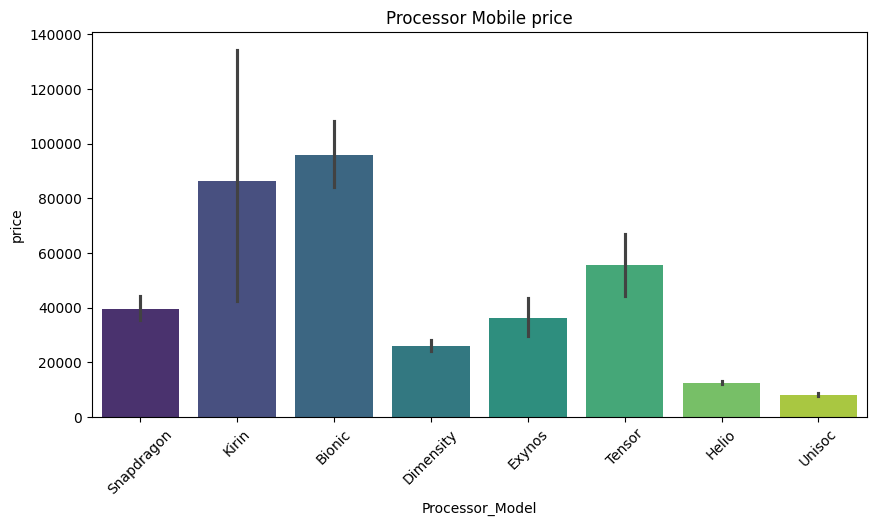

In [333]:
y = df.groupby("Processor_Model").count()["model"] 
temp_df1 =y[y> 6]
plt.figure(figsize=(10, 5))
process  = df[df["Processor_Model"].isin(temp_df1.index)]
sns.barplot(data= process,x="Processor_Model",y="price",hue="Processor_Model", # Assigns color per processor
    palette="viridis",     
    legend=False)
plt.title("Processor Mobile price")
plt.xticks(rotation=45)
plt.show()

#### Processor with good ratings are
1. SnapDragon
2. Dimensity
3. Helio

### Processor with low rating
1. Unisoc

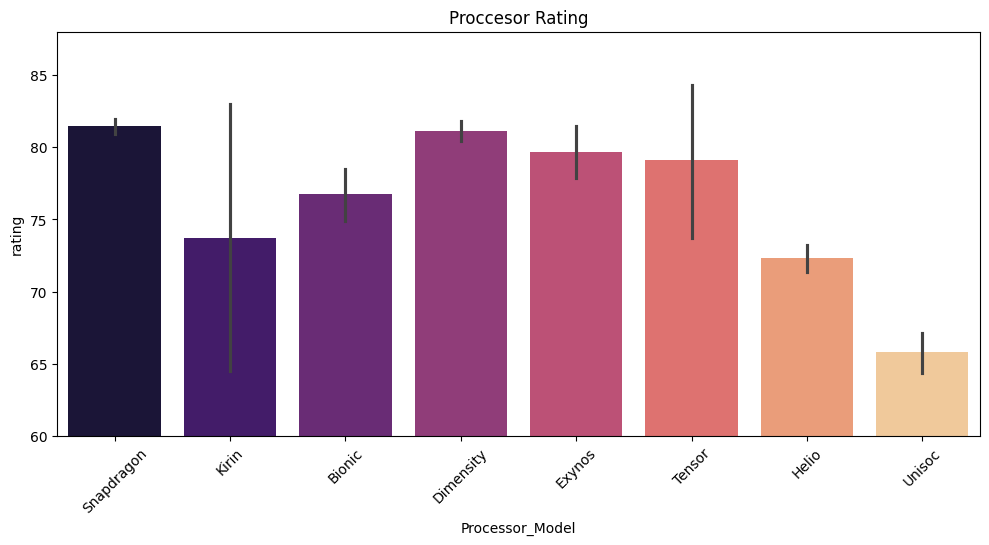

In [334]:

plt.figure(figsize=(10, 5))
sns.barplot(data= process,x="Processor_Model",y="rating",hue="Processor_Model", 
    palette="magma",     
    legend=False)
plt.title("Proccesor Rating")
plt.tight_layout()
plt.xticks(rotation=45)
plt.ylim(60,88)
plt.show()

# Processor Cores Market Segmentation

## Performance Tiers

### 4 Core Processors
- **Price Status:** Lowest
- **Rating Status:** Lowest
- **Market Position:** Budget / Entry
- **Target Audience:** Basic users, entry-level smartphones

### 6 Core Processors
- **Price Status:** Highest
- **Rating Status:** Mid-High
- **Market Position:** High-End / Premium
- **Target Audience:** Premium users seeking balance

### 8 Core Processors
- **Price Status:** High
- **Rating Status:** Highest
- **Market Position:** Enthusiast / Performance
- **Target Audience:** Power users, gaming, multitasking

---



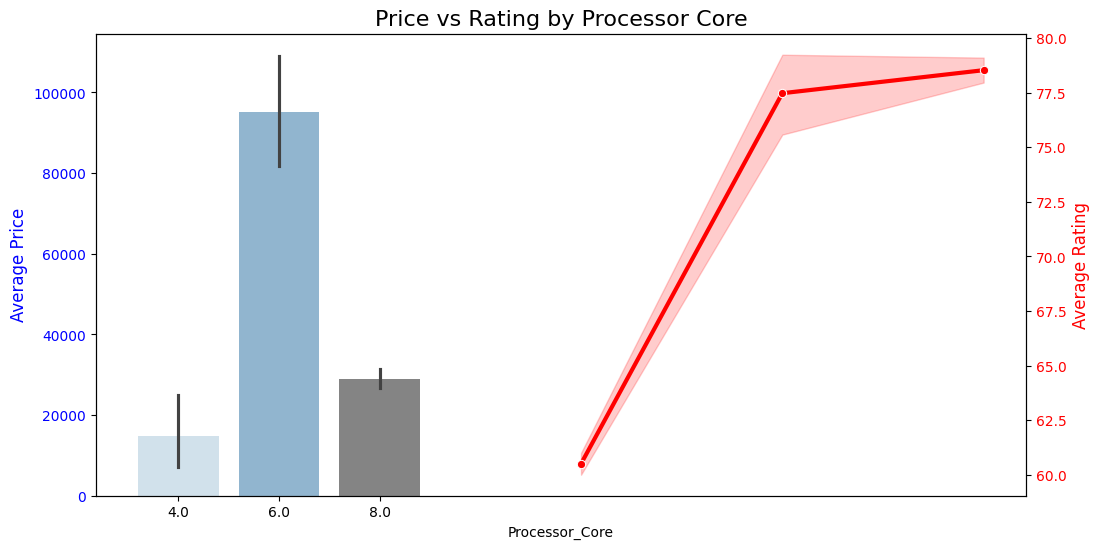

In [335]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Price
sns.barplot(data=temp_df, x="Processor_Core", y="price", alpha=0.6, ax=ax1, palette="Blues_d", hue="Processor_Core", legend=False)
ax1.set_ylabel("Average Price", fontsize=12, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Line plot for Rating (Secondary Axis)
ax2 = ax1.twinx()
sns.lineplot(data=temp_df, x="Processor_Core", y="rating", marker="o", color="red", ax=ax2, linewidth=3)
ax2.set_ylabel("Average Rating", fontsize=12, color="red")
ax2.tick_params(axis='y', labelcolor="red")

plt.title("Price vs Rating by Processor Core", fontsize=16)
plt.show()

### Replaceing low 5 os that are low frequent with other

In [336]:

idx  = df["OS_Name"].value_counts().tail(5).index

for i in idx:
    df["OS_Name"] = df["OS_Name"].replace({i:"other"},inplace=True)
df["OS_Name"] = df["OS_Name"].str.lower()
df["OS_Name"].value_counts()

OS_Name
android    925
ios         46
other       10
Name: count, dtype: int64


# Processor Core Distribution by Operating System

## Key Findings

- **Android devices predominantly use 8-core processors** .
- **iOS devices favor 6-core processors** 
```

<Figure size 1200x600 with 0 Axes>

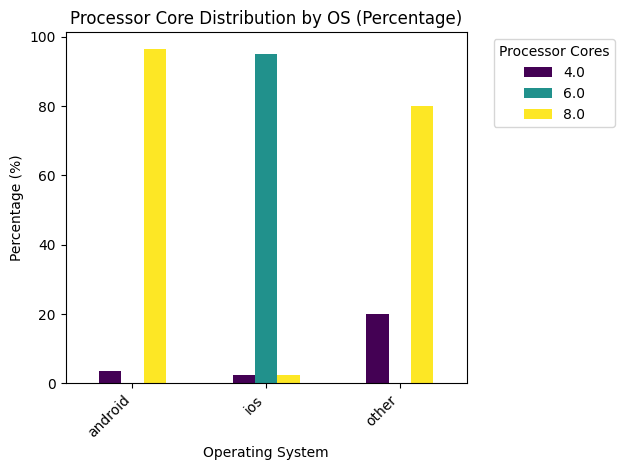

In [337]:

crosstab_data = round(pd.crosstab(df["Processor_Core"], df["OS_Name"], normalize="columns") * 100, 2)

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
crosstab_data.T.plot(kind="bar", colormap="viridis")
plt.title("Processor Core Distribution by OS (Percentage)")
plt.xlabel("Operating System")
plt.ylabel("Percentage (%)")
plt.legend(title="Processor Cores", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

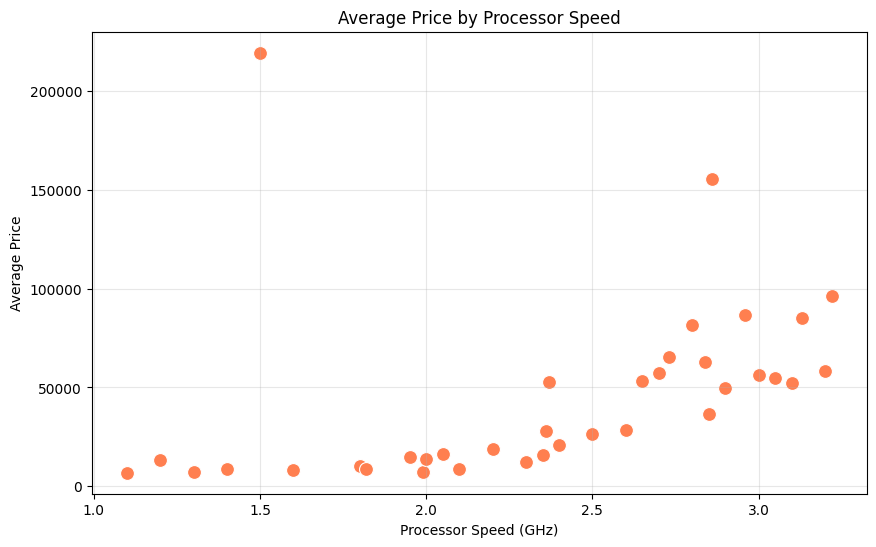

In [338]:
# Calculate mean price by processor speed
speed_price = round(df.groupby("Processor_Speed")["price"].mean(), 2)

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=speed_price.index, y=speed_price.values, s=100, color='coral')
plt.title("Average Price by Processor Speed")
plt.xlabel("Processor Speed (GHz)")
plt.ylabel("Average Price")
plt.grid(alpha=0.3)
plt.show()

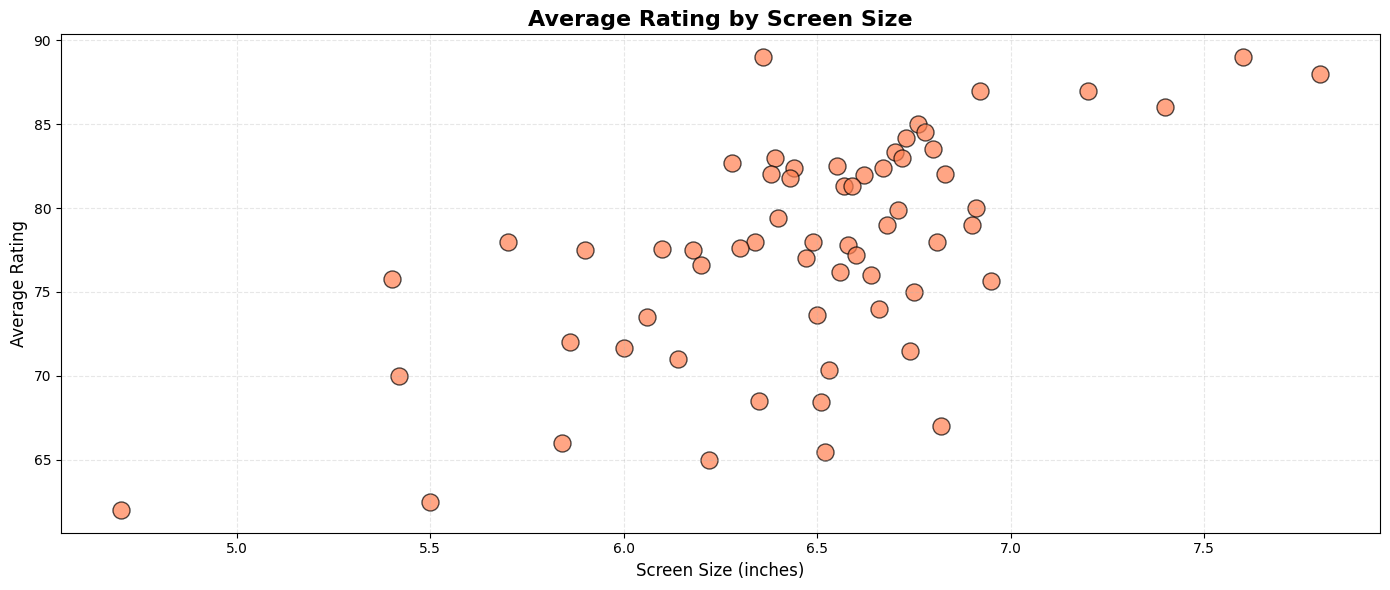

In [339]:
# Get screen sizes that have non-null mean ratings
valid_screen_sizes = df.groupby("Screen_size")["rating"].mean().dropna().index
df_filtered = df[df["Screen_size"].isin(valid_screen_sizes)]
temp_df = round(df_filtered.groupby("Screen_size")["rating"].mean(), 2).sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.scatterplot(x=temp_df.index, y=temp_df.values, s=150, color='coral', edgecolor='black', alpha=0.7)

plt.title("Average Rating by Screen Size", fontsize=16, fontweight='bold')
plt.xlabel("Screen Size (inches)", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [340]:
# Drop the index column
df.drop(columns=["index"], inplace=True)

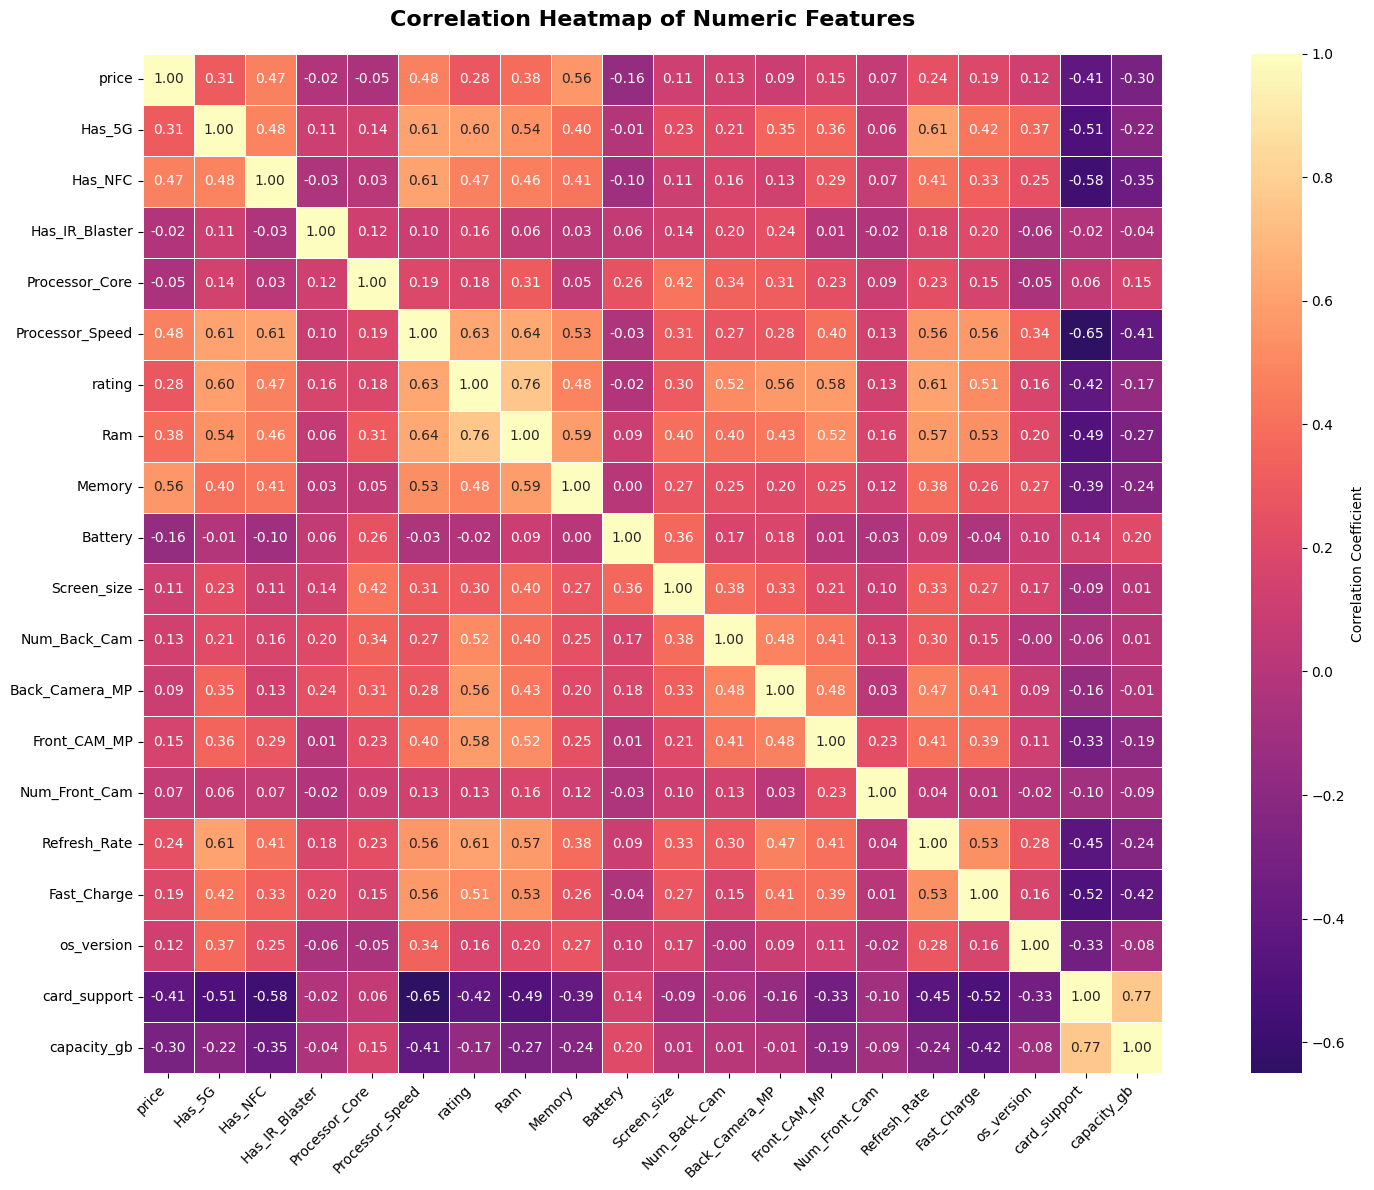

In [341]:


# Create correlation heatmap with improvements
plt.figure(figsize=(18, 12))
correlation = df.corr(numeric_only=True)

sns.heatmap(correlation, 
            annot=True,          
            fmt='.2f',            
            cmap='magma',     
            center=0,            
            square=True,          
            linewidths=0.5,       
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Heatmap of Numeric Features', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [342]:


a = df.corr(numeric_only=True)["price"].reset_index()
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            981 non-null    str    
 1   model            981 non-null    str    
 2   price            981 non-null    int64  
 3   Has_5G           981 non-null    bool   
 4   Has_NFC          981 non-null    bool   
 5   Has_IR_Blaster   981 non-null    bool   
 6   Processor_Model  981 non-null    object 
 7   Processor_Name   981 non-null    str    
 8   Processor_Core   975 non-null    float64
 9   Processor_Speed  948 non-null    float64
 10  rating           879 non-null    float64
 11  Ram              978 non-null    float64
 12  Memory           981 non-null    float64
 13  Battery          970 non-null    float64
 14  Screen_size      981 non-null    float64
 15  Resolution       981 non-null    str    
 16  Num_Back_Cam     981 non-null    int64  
 17  Back_Camera_MP   981 non-nu

In [343]:
from sklearn.impute import KNNImputer
imputer  = KNNImputer(n_neighbors=5)
# 1. Get the list of column names
num_cols = list(df.select_dtypes(include=["float64", "int64"]).drop(columns=["price"], errors='ignore').columns)

# 2. Impute the DATA from those columns, not the names!
# Note: we use df[num_cols] inside the fit_transform
imputed_values = imputer.fit_transform(df[num_cols])

# 3. Assign back to the dataframe
df[num_cols] = imputed_values
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            981 non-null    str    
 1   model            981 non-null    str    
 2   price            981 non-null    int64  
 3   Has_5G           981 non-null    bool   
 4   Has_NFC          981 non-null    bool   
 5   Has_IR_Blaster   981 non-null    bool   
 6   Processor_Model  981 non-null    object 
 7   Processor_Name   981 non-null    str    
 8   Processor_Core   981 non-null    float64
 9   Processor_Speed  981 non-null    float64
 10  rating           981 non-null    float64
 11  Ram              981 non-null    float64
 12  Memory           981 non-null    float64
 13  Battery          981 non-null    float64
 14  Screen_size      981 non-null    float64
 15  Resolution       981 non-null    str    
 16  Num_Back_Cam     981 non-null    float64
 17  Back_Camera_MP   981 non-nu

In [344]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Clean Data
df = df.drop(df.index[0]).reset_index(drop=True)

# 2. Identify Column Types
# We drop "price" from features, and also drop specific columns you don't want
X_raw = df.drop(columns=["model","Processor_Name", "price"])
y = df["price"]

cat_cols = list(X_raw.select_dtypes(include=['object']).columns)
num_cols = list(X_raw.select_dtypes(include=['float64', 'int64']).columns)

# 3. Setup the Transformer (One-Hot for categories, Scaling for numbers)
# This does EVERYTHING in one step!
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(drop='first', sparse_output=False), cat_cols),
    ('scaler', StandardScaler(), num_cols)
])

X_final = ct.fit_transform(X_raw)


In [345]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# test_size=0.2 means 80% for training, 20% for testing
# random_state=42 acts as a "seed" so you get the same split every time you run it
X_train, X_test, y_train, y_test = train_test_split(
    X_final, 
    y, 
    test_size=0.2, 
    random_state=42
)
# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, 
    max_depth=10, 
    random_state=42,
    n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR (Support Vector)": SVR(kernel='rbf'),
    "K-Neighbors": KNeighborsRegressor(n_neighbors=5)
}

# Dictionary to store scores
results = {}

# Loop through each model, train, and predict
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = r2_score(y_test, predictions)
    results[name] = score
    print(f"{name} R2 Score: {score:.4f}")
    
    
from sklearn.model_selection import cross_val_score
rf_model = RandomForestRegressor(n_estimators=200, 
    max_depth=10, 
    random_state=42,
    n_jobs=-1)
# Test the model on 5 different "folds" of the data
cv_scores = cross_val_score(rf_model, X_final, y, cv=5)

print(f"All CV Scores: {cv_scores}")
print(f"Average CV Score: {cv_scores.mean():.4f}")

Linear Regression R2 Score: 0.7558
Random Forest R2 Score: 0.8481
Gradient Boosting R2 Score: 0.7852
SVR (Support Vector) R2 Score: -0.1344
K-Neighbors R2 Score: 0.7285
All CV Scores: [ -1.19449927  -6.56247776 -13.54663339 -90.57298986 -11.1838495 ]
Average CV Score: -24.6121


In [346]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 1. Scaling (Crucial for Ridge, ElasticNet, and SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Define models with key parameters
models = {
    "Ridge Regression": Ridge(alpha=1.0), 
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, subsample=0.8),
    "LightGBM": LGBMRegressor(n_estimators=200, learning_rate=0.05, num_leaves=31)
}

# 3. Train and Evaluate
print(f"{'Algorithm':<20} | {'R2 Score':<10}")
print("-" * 35)

for name, model in models.items():
    # Use scaled data for all to be safe
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)
    print(f"{name:<20} | {score:.4f}")

Algorithm            | R2 Score  
-----------------------------------
Ridge Regression     | 0.7648
Elastic Net          | 0.7938
Gradient Boosting    | 0.7771
XGBoost              | 0.9013
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 394
[LightGBM] [Info] Number of data points in the train set: 784, number of used features: 42
[LightGBM] [Info] Start training from score 32532.204082
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

In [365]:
from sklearn.metrics import mean_squared_error
XGB_model  = XGBRegressor(n_estimators=260, learning_rate=0.05, max_depth=5, subsample=0.8)
XGB_model.fit(X_train_scaled, y_train)
y_pred = XGB_model.predict(X_test_scaled)
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Often, we take the Square Root (RMSE) to get back to original units
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R2 Score {score:.4f}")


Mean Squared Error: 59656462.8684
Root Mean Squared Error: 7723.7596
R2 Score 0.9031


In [366]:
print(df.loc[900])

Brand                     Vivo
model                Vivo Y15s
price                     8499
Has_5G                   False
Has_NFC                  False
Has_IR_Blaster           False
Processor_Model          Helio
Processor_Name           Helio
Processor_Core             8.0
Processor_Speed            2.3
rating                    66.0
Ram                        3.0
Memory                    32.0
Battery                 5000.0
Screen_size               6.51
Resolution         720 x 1600 
Num_Back_Cam               2.0
Back_Camera_MP            13.0
Front_CAM_MP               8.0
Num_Front_Cam              1.0
Refresh_Rate              60.0
Fast_Charge               11.0
OS_Name                android
os_version                11.0
card_support               1.0
slot_type            Dedicated
capacity_gb             1024.0
Name: 900, dtype: object


In [367]:
p = 10
# 1. Get the raw row from your features (X)
# We use loc[p:p] to keep it as a DataFrame, which the transformer needs
raw_row = X_raw.loc[p:p]

# 2. Use the ColumnTransformer (ct) to encode AND scale in one go
scaled_row = ct.transform(raw_row)

# 3. Predict
prediction = XGB_model.predict(scaled_row)

print(f"The Predicted Price is: {prediction[0]:.2f}")
print(f"Actual Price was: {y.iloc[p]}")

The Predicted Price is: 152282.84
Actual Price was: 162990


In [368]:
raw_row.columns

Index(['Brand', 'Has_5G', 'Has_NFC', 'Has_IR_Blaster', 'Processor_Model',
       'Processor_Core', 'Processor_Speed', 'rating', 'Ram', 'Memory',
       'Battery', 'Screen_size', 'Resolution', 'Num_Back_Cam',
       'Back_Camera_MP', 'Front_CAM_MP', 'Num_Front_Cam', 'Refresh_Rate',
       'Fast_Charge', 'OS_Name', 'os_version', 'card_support', 'slot_type',
       'capacity_gb'],
      dtype='str')

In [369]:
X_final

array([[ 0.        ,  0.        ,  0.        , ..., -1.58404931,
        -1.28959043, -0.98988177],
       [ 0.        ,  0.        ,  0.        , ..., -5.42116308,
         0.77544   , -0.44209211],
       [ 0.        ,  0.        ,  0.        , ..., -0.94453035,
         0.77544   , -0.44209211],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -4.07817326,
         0.77544   , -0.85293436],
       [ 0.        ,  0.        ,  0.        , ..., -4.07817326,
         0.77544   , -0.85293436],
       [ 0.        ,  0.        ,  0.        , ..., -1.58404931,
         0.77544   , -0.71598694]])

In [370]:
# From your training data
processor_lookup = df.groupby('Processor_Name')[['Processor_Core', 'Processor_Speed']].first().to_dict('index')

# camera_lookup = df.groupby('original_camera_col')[['Num_Back_Cam', 'Back_Camera_MP', 'Num_Front_Cam', 'Front_CAM_MP']].first().to_dict('index')
processor_lookup

{'Bionic A': {'Processor_Core': 4.0, 'Processor_Speed': 2.37},
 'Bionic A13': {'Processor_Core': 6.0, 'Processor_Speed': 2.65},
 'Bionic A14': {'Processor_Core': 6.0, 'Processor_Speed': 3.1},
 'Bionic A15': {'Processor_Core': 6.0, 'Processor_Speed': 3.22},
 'Bionic A16': {'Processor_Core': 6.0, 'Processor_Speed': 3.148},
 'Bionic A17': {'Processor_Core': 8.0, 'Processor_Speed': 2.8800000000000003},
 'Dimensity 1000+': {'Processor_Core': 8.0, 'Processor_Speed': 2.6},
 'Dimensity 1080': {'Processor_Core': 8.0, 'Processor_Speed': 2.6},
 'Dimensity 1100 5G': {'Processor_Core': 8.0, 'Processor_Speed': 2.6},
 'Dimensity 1200': {'Processor_Core': 8.0, 'Processor_Speed': 3.0},
 'Dimensity 1200 Max': {'Processor_Core': 8.0, 'Processor_Speed': 3.0},
 'Dimensity 1300': {'Processor_Core': 8.0, 'Processor_Speed': 3.0},
 'Dimensity 700': {'Processor_Core': 8.0, 'Processor_Speed': 2.2},
 'Dimensity 700 5G': {'Processor_Core': 8.0, 'Processor_Speed': 2.2},
 'Dimensity 720': {'Processor_Core': 8.0, 'Pr

In [371]:
df.head(1)

,Brand,model,price,Has_5G,Has_NFC,Has_IR_Blaster,Processor_Model,Processor_Name,Processor_Core,Processor_Speed,rating,Ram,Memory,Battery,Screen_size,Resolution,Num_Back_Cam,Back_Camera_MP,Front_CAM_MP,Num_Front_Cam,Refresh_Rate,Fast_Charge,OS_Name,os_version,card_support,slot_type,capacity_gb
0,Xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,False,True,False,Snapdragon,Snapdragon 855,8.0,2.8,88.0,8.0,256.0,4000.0,6.39,1080 x 2340,3.0,48.0,20.0,1.0,60.0,27.0,android,9.0,0.0,Not Slot,0.0


In [377]:
import pickle

# Save both
with open("app/model/ct.pkl", "wb") as f:
    pickle.dump(ct, f)

with open("app/model/model.pkl", "wb") as f:
    pickle.dump(XGB_model, f)

print("Saved ct.pkl and model.pkl")

df.drop(columns=["price","model"],inplace=True)
df.to_csv("app/data/data.csv")

Saved ct.pkl and model.pkl


In [378]:
df.columns

Index(['Brand', 'Has_5G', 'Has_NFC', 'Has_IR_Blaster', 'Processor_Model',
       'Processor_Name', 'Processor_Core', 'Processor_Speed', 'rating', 'Ram',
       'Memory', 'Battery', 'Screen_size', 'Resolution', 'Num_Back_Cam',
       'Back_Camera_MP', 'Front_CAM_MP', 'Num_Front_Cam', 'Refresh_Rate',
       'Fast_Charge', 'OS_Name', 'os_version', 'card_support', 'slot_type',
       'capacity_gb'],
      dtype='str')

In [379]:
# Run all of these
print("Brands:", df["Brand"].unique().tolist())
print("Processor_Model:", df["Processor_Model"].unique().tolist())
print("Processor_Name:", df["Processor_Name"].unique().tolist())
print("Resolution:", df["Resolution"].unique().tolist())
print("OS_Name:", df["OS_Name"].unique().tolist())
print("slot_type:", df["slot_type"].unique().tolist())
print("Ram:", sorted(df["Ram"].unique().tolist()))
print("Memory:", sorted(df["Memory"].unique().tolist()))
print("Battery:", sorted(df["Battery"].unique().tolist()))
print("Screen_size:", sorted(df["Screen_size"].unique().tolist()))
print("Refresh_Rate:", sorted(df["Refresh_Rate"].unique().tolist()))
print("Back_Camera_MP:", sorted(df["Back_Camera_MP"].unique().tolist()))
print("Front_CAM_MP:", sorted(df["Front_CAM_MP"].unique().tolist()))
print("Num_Back_Cam:", sorted(df["Num_Back_Cam"].unique().tolist()))
print("Num_Front_Cam:", sorted(df["Num_Front_Cam"].unique().tolist()))

Brands: ['Xiaomi', 'Huawei', 'Apple', 'Samsung', 'Royole', 'Sony', 'Oppo', 'Leitz', 'Vivo', 'Asus', 'Honor', 'Google', 'Lg', 'Oneplus', 'Tesla', 'Iqoo', 'Zte', 'Nubia', 'Motorola', 'Lenovo', 'Sharp', 'Tecno', 'Nokia', 'Realme', 'Doogee', 'Poco', 'Nothing', 'Infinix', 'Oukitel', 'Redmi', 'Lava', 'Cat', 'Cola', 'Blu', 'Jio', 'Leeco', 'Duoqin', 'Blackview', 'Tcl', 'Ikall', 'Micromax', 'Gionee', 'Letv', 'Itel', 'Lyf']
Processor_Model: ['Snapdragon', 'Kirin', 'Bionic', 'Dimensity', 'Exynos', 'Tensor', 'Tesla', 'Helio', 'Unisoc']
Processor_Name: ['Snapdragon 855', 'Snapdragon 8+ Gen1', 'Kirin 990', 'Snapdragon 855+', 'Bionic A16', 'Bionic A15', 'Snapdragon 888', 'Bionic A17', 'Bionic A14', 'Snapdragon 865', 'Snapdragon 8 Gen1', 'Snapdragon 8+ Gen 2', 'Snapdragon 8 Gen2', 'Bionic A13', 'Dimensity 9000', 'Exynos 2100', 'Exynos 990', 'Kirin 9000E', 'Exynos 9825', 'Tensor G2', 'Tensor', 'Exynos 9820', 'Tensor 3', 'Tesla Custom Chip', 'Kirin 9000', 'Dimensity 9200', 'Exynos 2200', 'Snapdragon 765